<a href="https://colab.research.google.com/github/DG0110/Regressify-Exploring-the-Art-of-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/BA course/Statistics and Descriptive Analytics-20231223T125404Z-001/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/BA course/Statistics and Descriptive Analytics-20231223T125404Z-001/Statistics and Descriptive Analytics/Linear Regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import Libraries

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BA course/Statistics and Descriptive Analytics-20231223T125404Z-001/Statistics and Descriptive Analytics/Linear Regression/diamond.csv')
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [ ]:
df.describe()

,Unnamed: 0,carat,price
count,308.000000,308.000000,308.000000
mean,154.500000,0.630909,5019.483766
std,89.056162,0.277183,3403.115715
min,1.000000,0.180000,638.000000
25%,77.750000,0.350000,1625.000000
50%,154.500000,0.620000,4215.000000
75%,231.250000,0.850000,7446.000000
max,308.000000,1.100000,16008.000000


### **Data Preparation**


In [ ]:
#isolate x and y
y = df.price
x = df.carat

In [ ]:
#adding constant
x = sm.add_constant(x)
x.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


### **Linear Regression**

In [ ]:
model1 = sm.OLS(endog=y, exog = x).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              5081.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                   4.65e-193
Time:                        08:11:54   Log-Likelihood:                         -2678.4
No. Observations:                 308   AIC:                                      5359.
Df Residuals:                     307   BIC:                                      5362.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### **Plot**

Text(0, 0.5, 'price')

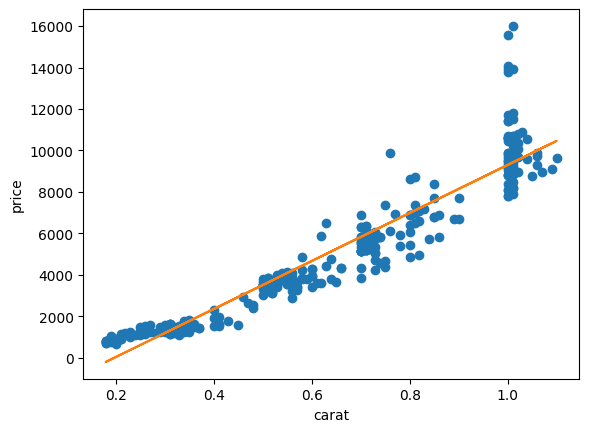

In [ ]:
x = df.carat
plt.plot (x, y , 'o')
b , a = np.polyfit(x, y , 1)
plt.plot(x, b*x + a)  # Equation => y = x + bx + a
plt.xlabel('carat')
plt.ylabel('price')

In [ ]:
print('Parameters', model1.params)
print('R squared', model1.rsquared)


Parameters const    -2298.357602
carat    11598.884013
dtype: float64
R squared 0.8925083858672299


## **Result Interpretation for Model1**


This is the result of a simple linear regression analysis, specifically an Ordinary Least Squares (OLS) regression, with the dependent variable being "price" and the independent variable being "carat.

1.  R-squared is a measure of how well the independent variable(s) explain the variance in the dependent variable. Here, the uncentered R-squared is 0.943, indicating that approximately 94.3% of the variance in the dependent variable (price) is explained by the independent variable (carat).

2. coef (Coefficient): The coefficient for the independent variable "carat" is 8543.7399. This indicates that for each unit increase in carat, the price is expected to increase by approximately 8543.74.

3. P>|t| (p-value): This is the p-value associated with the t-test for the coefficient. It indicates the probability of observing the data given that the null hypothesis (the coefficient is equal to zero) is true. In this case, the p-value is very low (0.000), means that the coefficient for "carat" is statistically significant.

In [ ]:
#Adding a binary varaible
df.carat.describe()

count    308.000000
mean       0.506494
std        0.500771
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: carat, dtype: float64

In [ ]:
df['carat_binary'] = np.where(df.carat > 0.3 , 1, 0)
df.head()


,Unnamed: 0,carat,colour,clarity,certification,price,carat_Binary,carat_binary
0,1,0,D,VS2,GIA,1302,0,0
1,2,0,E,VS1,GIA,1510,0,0
2,3,0,G,VVS1,GIA,1510,0,0
3,4,0,G,VS1,GIA,1260,0,0
4,5,0,D,VS1,GIA,1641,0,0


In [ ]:
#Create a Linear Regression with Carat_binary

In [ ]:
x1 = df.carat_binary
y1 = df.price

In [ ]:
x1 = sm.add_constant(x1)
x1.head()

,const,carat_binary
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [ ]:
model2 = sm.OLS(endog = y1, exog= x1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.79e-73
Time:                        08:36:08   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'price')

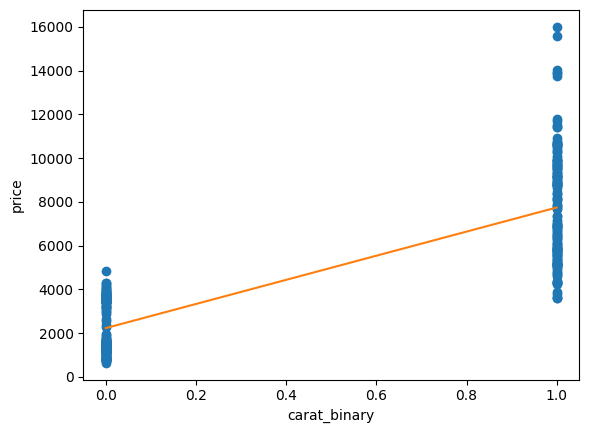

In [ ]:
#Plot
x1 = df.carat_binary
plt.plot(x1, y1, 'o')
b, a = np.polyfit(x1, y1, 1)
plt.plot(x1,x1*b + a )
plt.xlabel('carat_binary')
plt.ylabel('price')

## **Result Interpretation for Model2**

Model2 , the second model involves a binary variable for "carat," with values of either 0 or 1, it suggests that the variable is categorical rather than continuous.

This affects the interpretation of the coefficient for "carat_binary."

In this model"

1. "carat_binary" represents a categorical variable that distinguishes between two groups 0 and 1.

2. The coefficient for "carat_binary" (5516.8595) indicates the difference in the dependent variable (price) between the two categories represented by the binary variable. When "carat_binary" changes from 0 to 1 (from one category to the other), the price is expected to increase by approximately 5516.86.

